In [5]:
#Importing libraries for the task and data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data0 = pd.read_csv("Cleaned_Cancer_Row.csv") #load the corrected data

In [7]:
data0.head()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,Unnamed: 11
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


In [8]:
#As shown above while creating the csv file, the last column being "\n" we need to remove the last unnamed column
#id is not required in the analysis and can be dropped

list = ['Unnamed: 11', "id"]
data0.drop(list, axis=1, inplace=True)


In [10]:
y = data0.Class
list = ["Class"]
features = data0.drop(list, axis=1, inplace=False)

In [11]:
print(data0.isnull().sum())

Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


# Exploratory Data Analysis (EDA)

In [12]:
#Frequency of cancer stages
B, M = data0['Class'].value_counts()

In [13]:
print('Number of Malignant: ', M)
print('Number of Benign: ', B)

Number of Malignant:  239
Number of Benign:  444


Text(0.8, 250, 'Malignant=239')

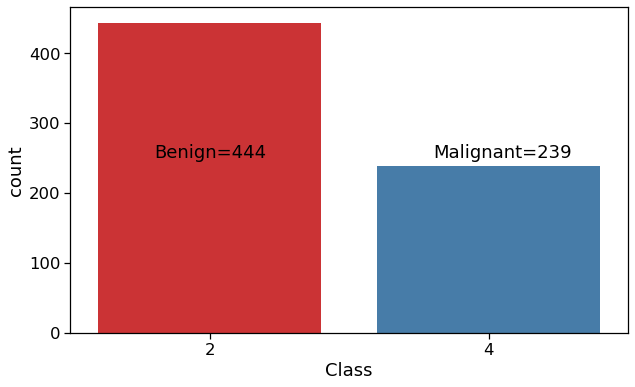

In [52]:
import seaborn as sns #for interative graph
plt.figure(figsize=(10,6))
sns.set_context("notebook", font_scale=1.5)
sns.countplot("Class", data=data0, palette="Set1")
plt.annotate("Benign=444", xy=(-0.2, 250), xytext=(-0.2,250), size=18, color="black")
plt.annotate("Malignant=239", xy=(0.8, 250), xytext=(0.8,250), size=18, color="black")

In [16]:
features.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [32]:
data0.keys()

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [33]:
#Standardization of features
stdX = (features-features.mean()) / (features.std())
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st, id_vars="Class", var_name = "features", value_name="value")

In [34]:
data_st

,Class,features,value
0,2,Clump_Thickness,0.197760
1,2,Clump_Thickness,0.197760
2,2,Clump_Thickness,-0.511269
3,2,Clump_Thickness,0.552274
4,2,Clump_Thickness,-0.156754
...,...,...,...
6142,2,Mitoses,-0.348145
6143,2,Mitoses,-0.348145
6144,4,Mitoses,0.228998
6145,4,Mitoses,-0.348145


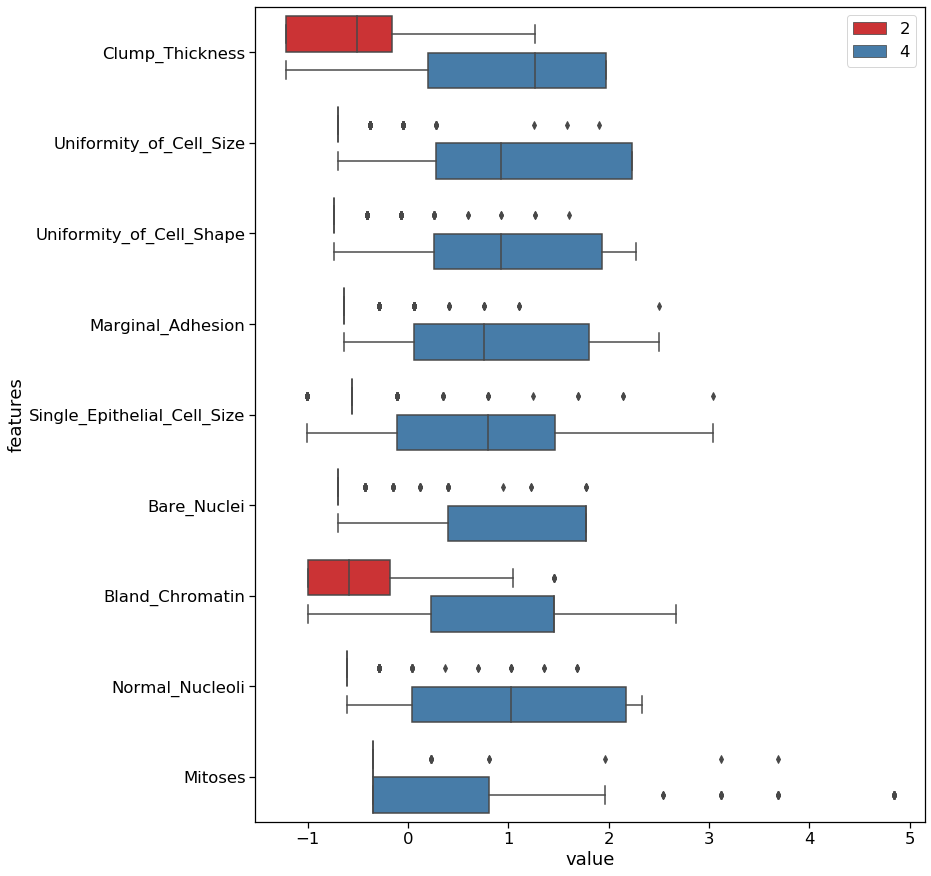

In [35]:
plt.figure(figsize=(12,15))
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(x="value", y="features", hue="Class", data=data_st, palette="Set1")
plt.legend(loc="best")

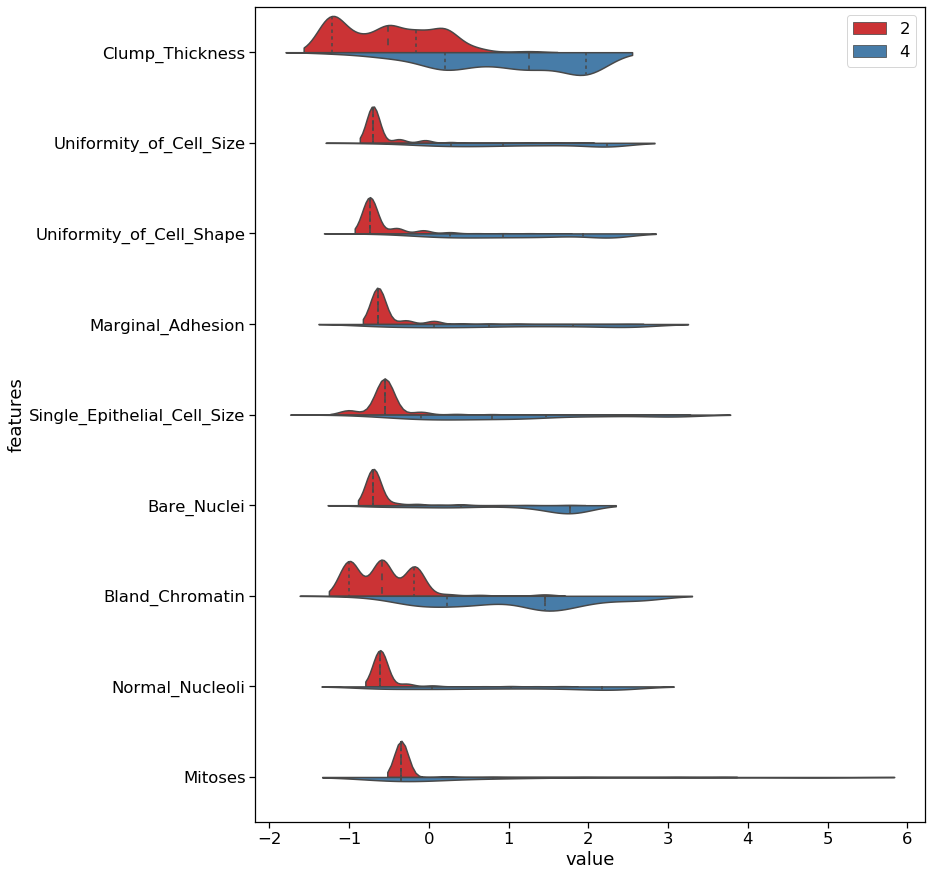

In [36]:
plt.figure(figsize=(12,15))
sns.set_context("notebook", font_scale=1.5)
sns.violinplot(x="value", y="features", hue="Class", data=data_st, split=True, inner="quart", palette="Set1")
plt.legend(loc="best")

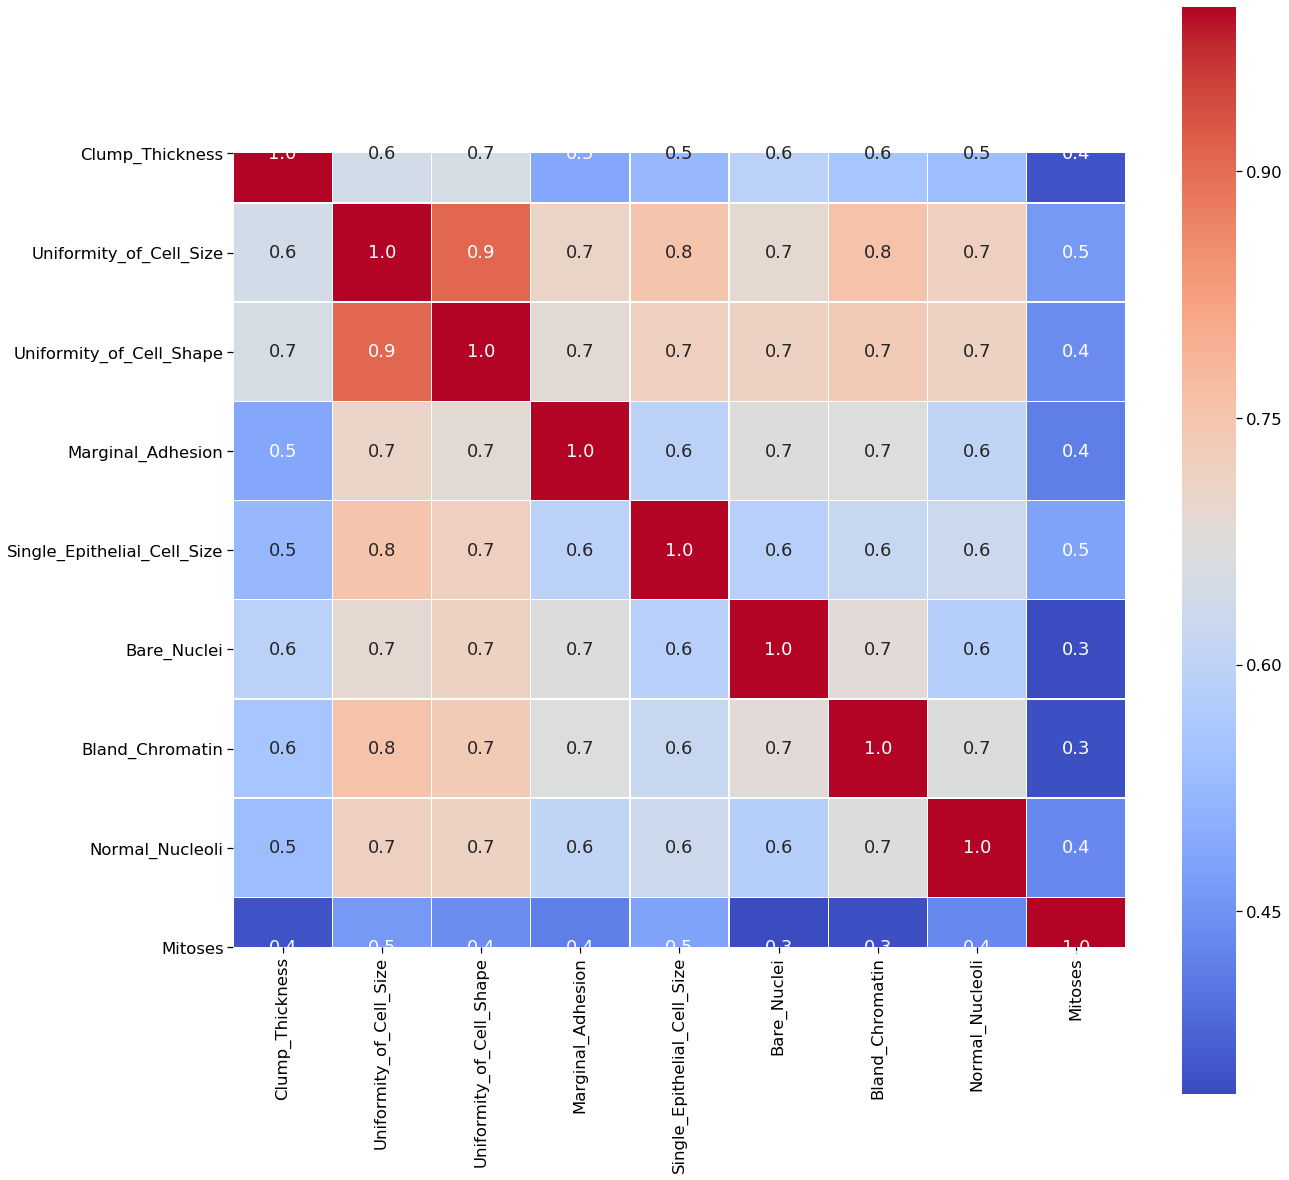

In [37]:
corr = features.corr() #corr finds the correlations
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt=".1f", xticklabels=True, yticklabels=True, cmap="coolwarm", linewidths=0.3, ax=ax)

In [40]:
def pearson(x,y):
    #Compute the correlation matrix for the function
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]


In [41]:
#Compute correlation between Uniformity_of_Cell_Size and Uniformity_of_Cell_Shape
r_eg = pearson(data0['Uniformity_of_Cell_Size'], data0['Uniformity_of_Cell_Shape'])
print(r_eg)

0.9072282331914413


In [46]:
name = []
for i, j in zip(range(1,10), range(1,10)):
    r = pearson(data0.iloc[:,1], data0.iloc[:,j])
    if abs(r) >=0.8 and data0.columns[j] not in name:
        name.append(data0.columns[j])
        
print("Attributes with correlation higher than 0.8: ",name)

Attributes with correlation higher than 0.8:  ['Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Class']


In [49]:
name = []
for i, j in zip(range(1,10), range(1,10)):
    r = pearson(data0.iloc[:,1], data0.iloc[:,j])
    if abs(r) <=0.5 and data0.columns[j] not in name:
        name.append(data0.columns[j])
        
print("Attributes with correlation less than 0.5: ",name)

Attributes with correlation less than 0.5:  ['Mitoses']


Uncorrelated data gives more information!


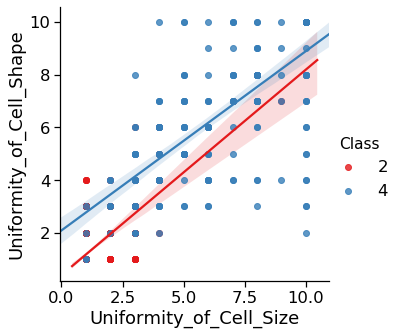

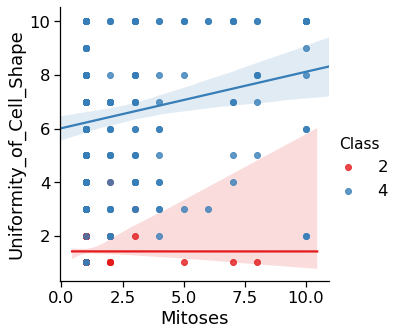

In [50]:
#Depicting the use of correlation using linear regression

#Using highly correlated data
sns.lmplot(x='Uniformity_of_Cell_Size', y='Uniformity_of_Cell_Shape', data=data0, hue="Class", palette="Set1")

#Using less correlated data
sns.lmplot(x='Mitoses', y='Uniformity_of_Cell_Shape', data=data0, hue="Class", palette="Set1")

print("Uncorrelated data gives more information!")

# Statistical Exploration of data

In [55]:
#Determining cummulative distribution function
def cdf(data0):
    n=len(data0)
    x=np.sort(data0)
    y=np.arange(1, n+1)/n
    return x, y


In [87]:
data2 = data0["Bland_Chromatin"]
Malignant2 = data2[data0['Class']==4]
Benign2 = data2[data0['Class']==2]

data3 = data0["Single_Epithelial_Cell_Size"]
Malignant3 = data3[data0['Class']==4]
Benign3 = data3[data0['Class']==2]

In [88]:
x1, y1 = cdf(Malignant2)
x2, y2 = cdf(Benign2)

x3, y3 = cdf(Malignant3)
x4, y4 = cdf(Benign3)

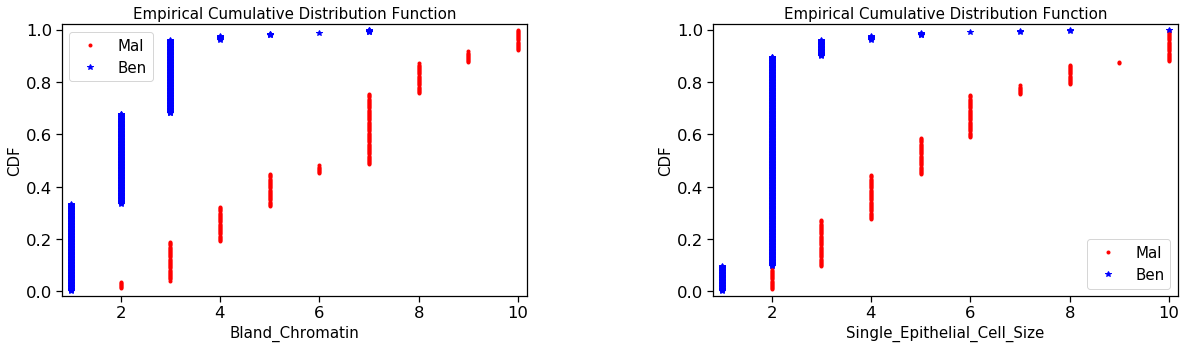

In [89]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.5, hspace=2)
plt.plot(x1, y1, marker='.', linestyle='none',color='red',label="Mal")
plt.plot(x2, y2, marker='*', linestyle='none',color='blue',label="Ben")
plt.margins(0.02)
plt.xlabel("Bland_Chromatin", size=15)
plt.ylabel("CDF", size=15)
plt.title("Empirical Cumulative Distribution Function", size=15)
plt.legend(prop={'size':15})

plt.subplot(2,2,2)
plt.subplots_adjust(wspace=0.4, hspace=2)
plt.plot(x3, y3, marker='.', linestyle='none',color='red',label="Mal")
plt.plot(x4, y4, marker='*', linestyle='none',color='blue',label="Ben")
plt.margins(0.02)
plt.xlabel("Single_Epithelial_Cell_Size", size=15)
plt.ylabel("CDF", size=15)
plt.title("Empirical Cumulative Distribution Function", size=15)
plt.legend(prop={'size':15})

# Hypothesis Testing

In [90]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [91]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [92]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [93]:
diff_of_means(Malignant2, Benign2)

3.8915620641562065

In [95]:
# Computing difference of mean overall acore
empirical_diff_means = diff_of_means(Malignant2, Benign2)

# Drawing 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Malignant2, Benign2,diff_of_means, size=10000)

# Computing p-value: p
p = np.sum(perm_replicates >= empirical_diff_means)/ len(perm_replicates) 

print('p-value =', p)

p-value = 0.0
